Importing the Required Libraries:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

Reading the data:

In [7]:
data = pd.read_csv('plant_disease_dataset.csv')

print(data.head())


   temperature   humidity   rainfall   soil_pH  disease_present
0    27.483571  33.215053   0.572758  4.975875                1
1    24.308678  36.945005  42.522346  8.165266                0
2    28.238443  34.026189  16.095303  6.316734                1
3    32.615149  41.104180  20.311015  6.164949                0
4    23.829233  51.971785  11.851323  8.482468                0


Splitting the data into training and test sets:

In [8]:
X = data.values[:, 0:4]
Y = data.values[:, 4]

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


[[ 0.32189968 -1.27450275 -0.93738372 -0.97510765]
 [-0.22421968 -1.11003436  3.32074982  1.47374945]
 [ 0.45174666 -1.23873652  0.63824726  0.05442193]
 ...
 [-0.7119186   0.87184652  0.36738525  0.65703976]
 [ 0.32108385  1.16621246 -0.0089187   1.14155865]
 [ 0.44890839  0.43128749 -0.49952425 -1.42991329]]


Training the model:

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Testing the model, and checking results.

In [10]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 76.27%


In [11]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      2274
         1.0       0.55      0.11      0.18       726

    accuracy                           0.76      3000
   macro avg       0.66      0.54      0.52      3000
weighted avg       0.72      0.76      0.70      3000



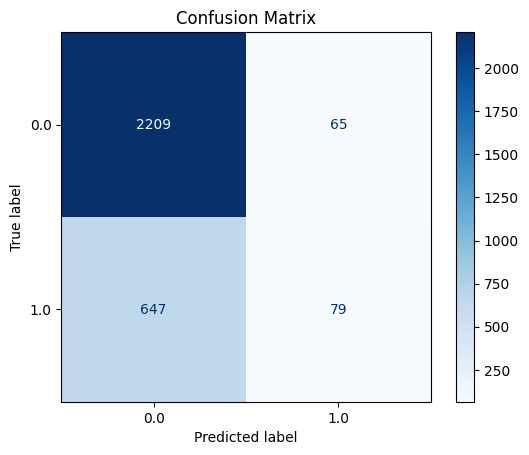

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

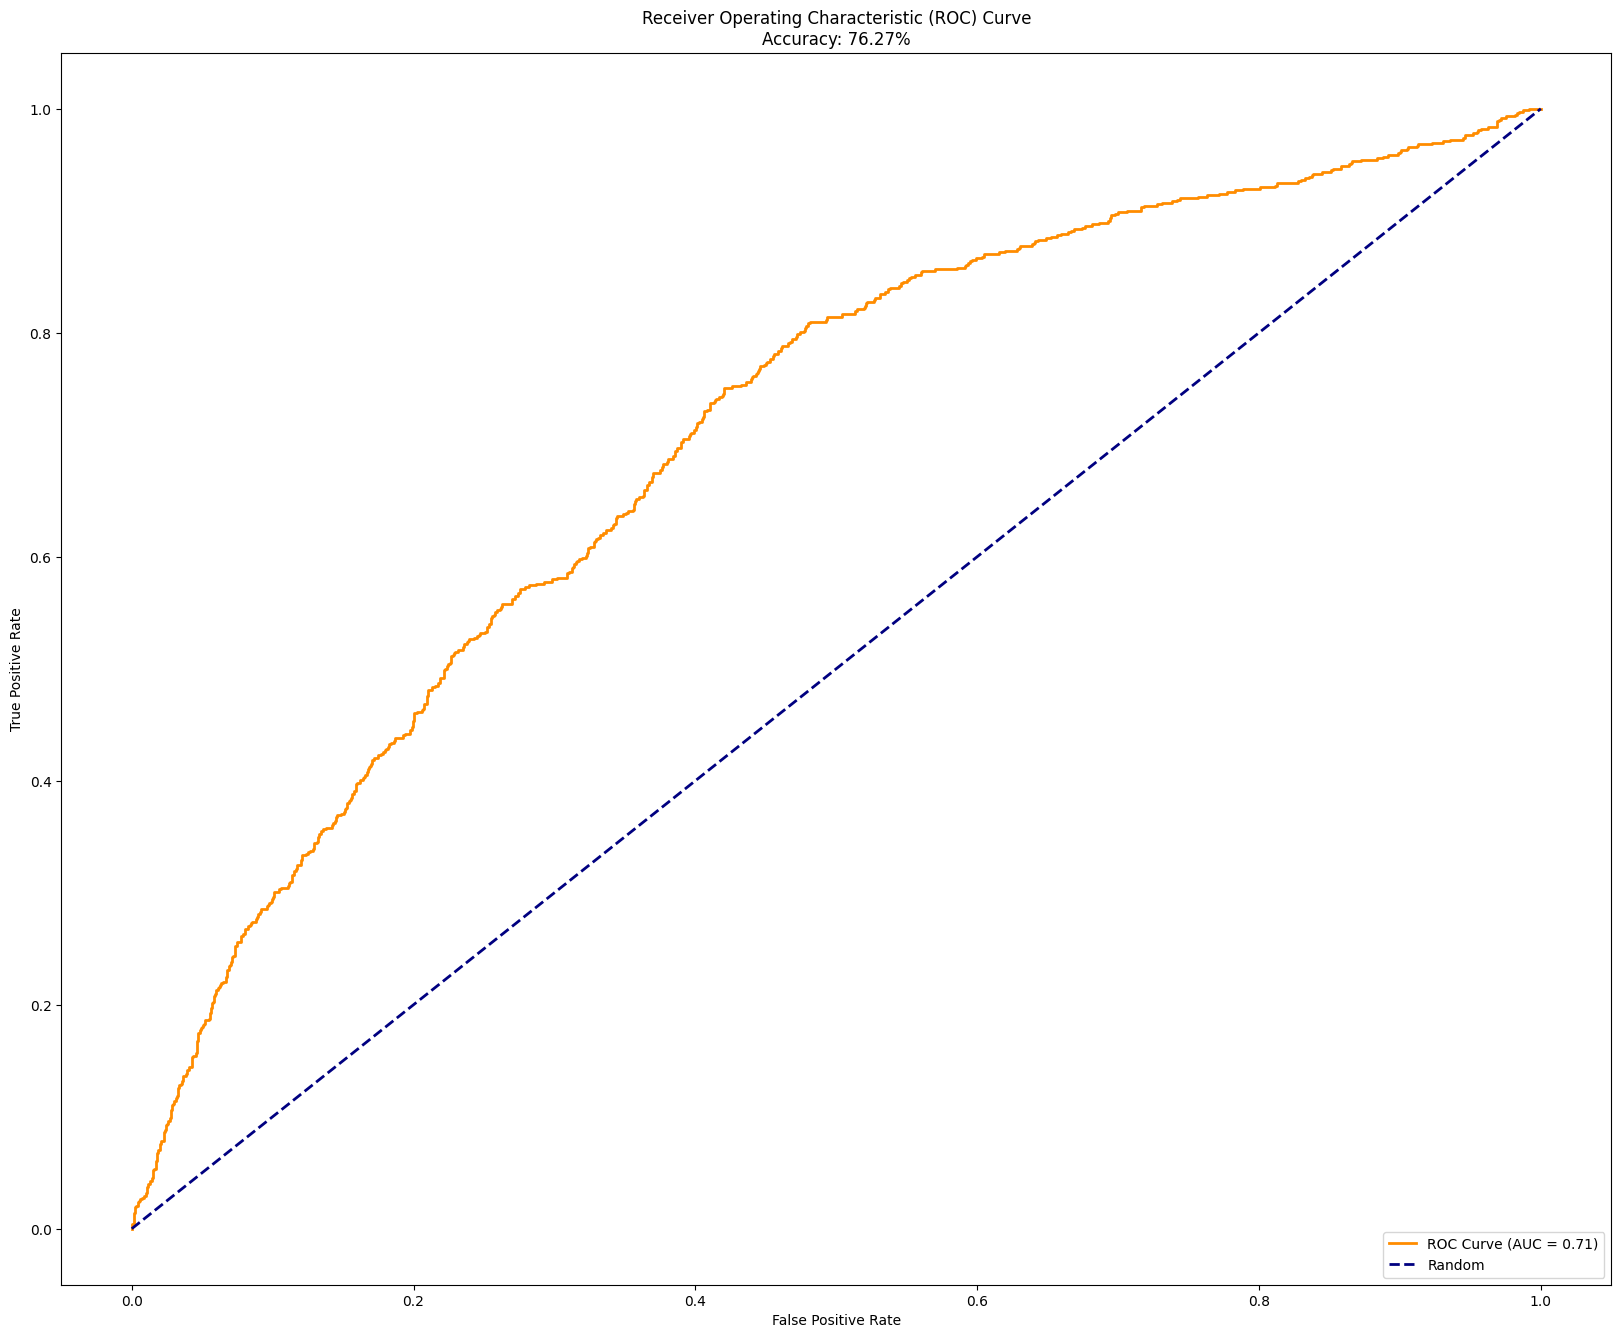

In [13]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(20, 16))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

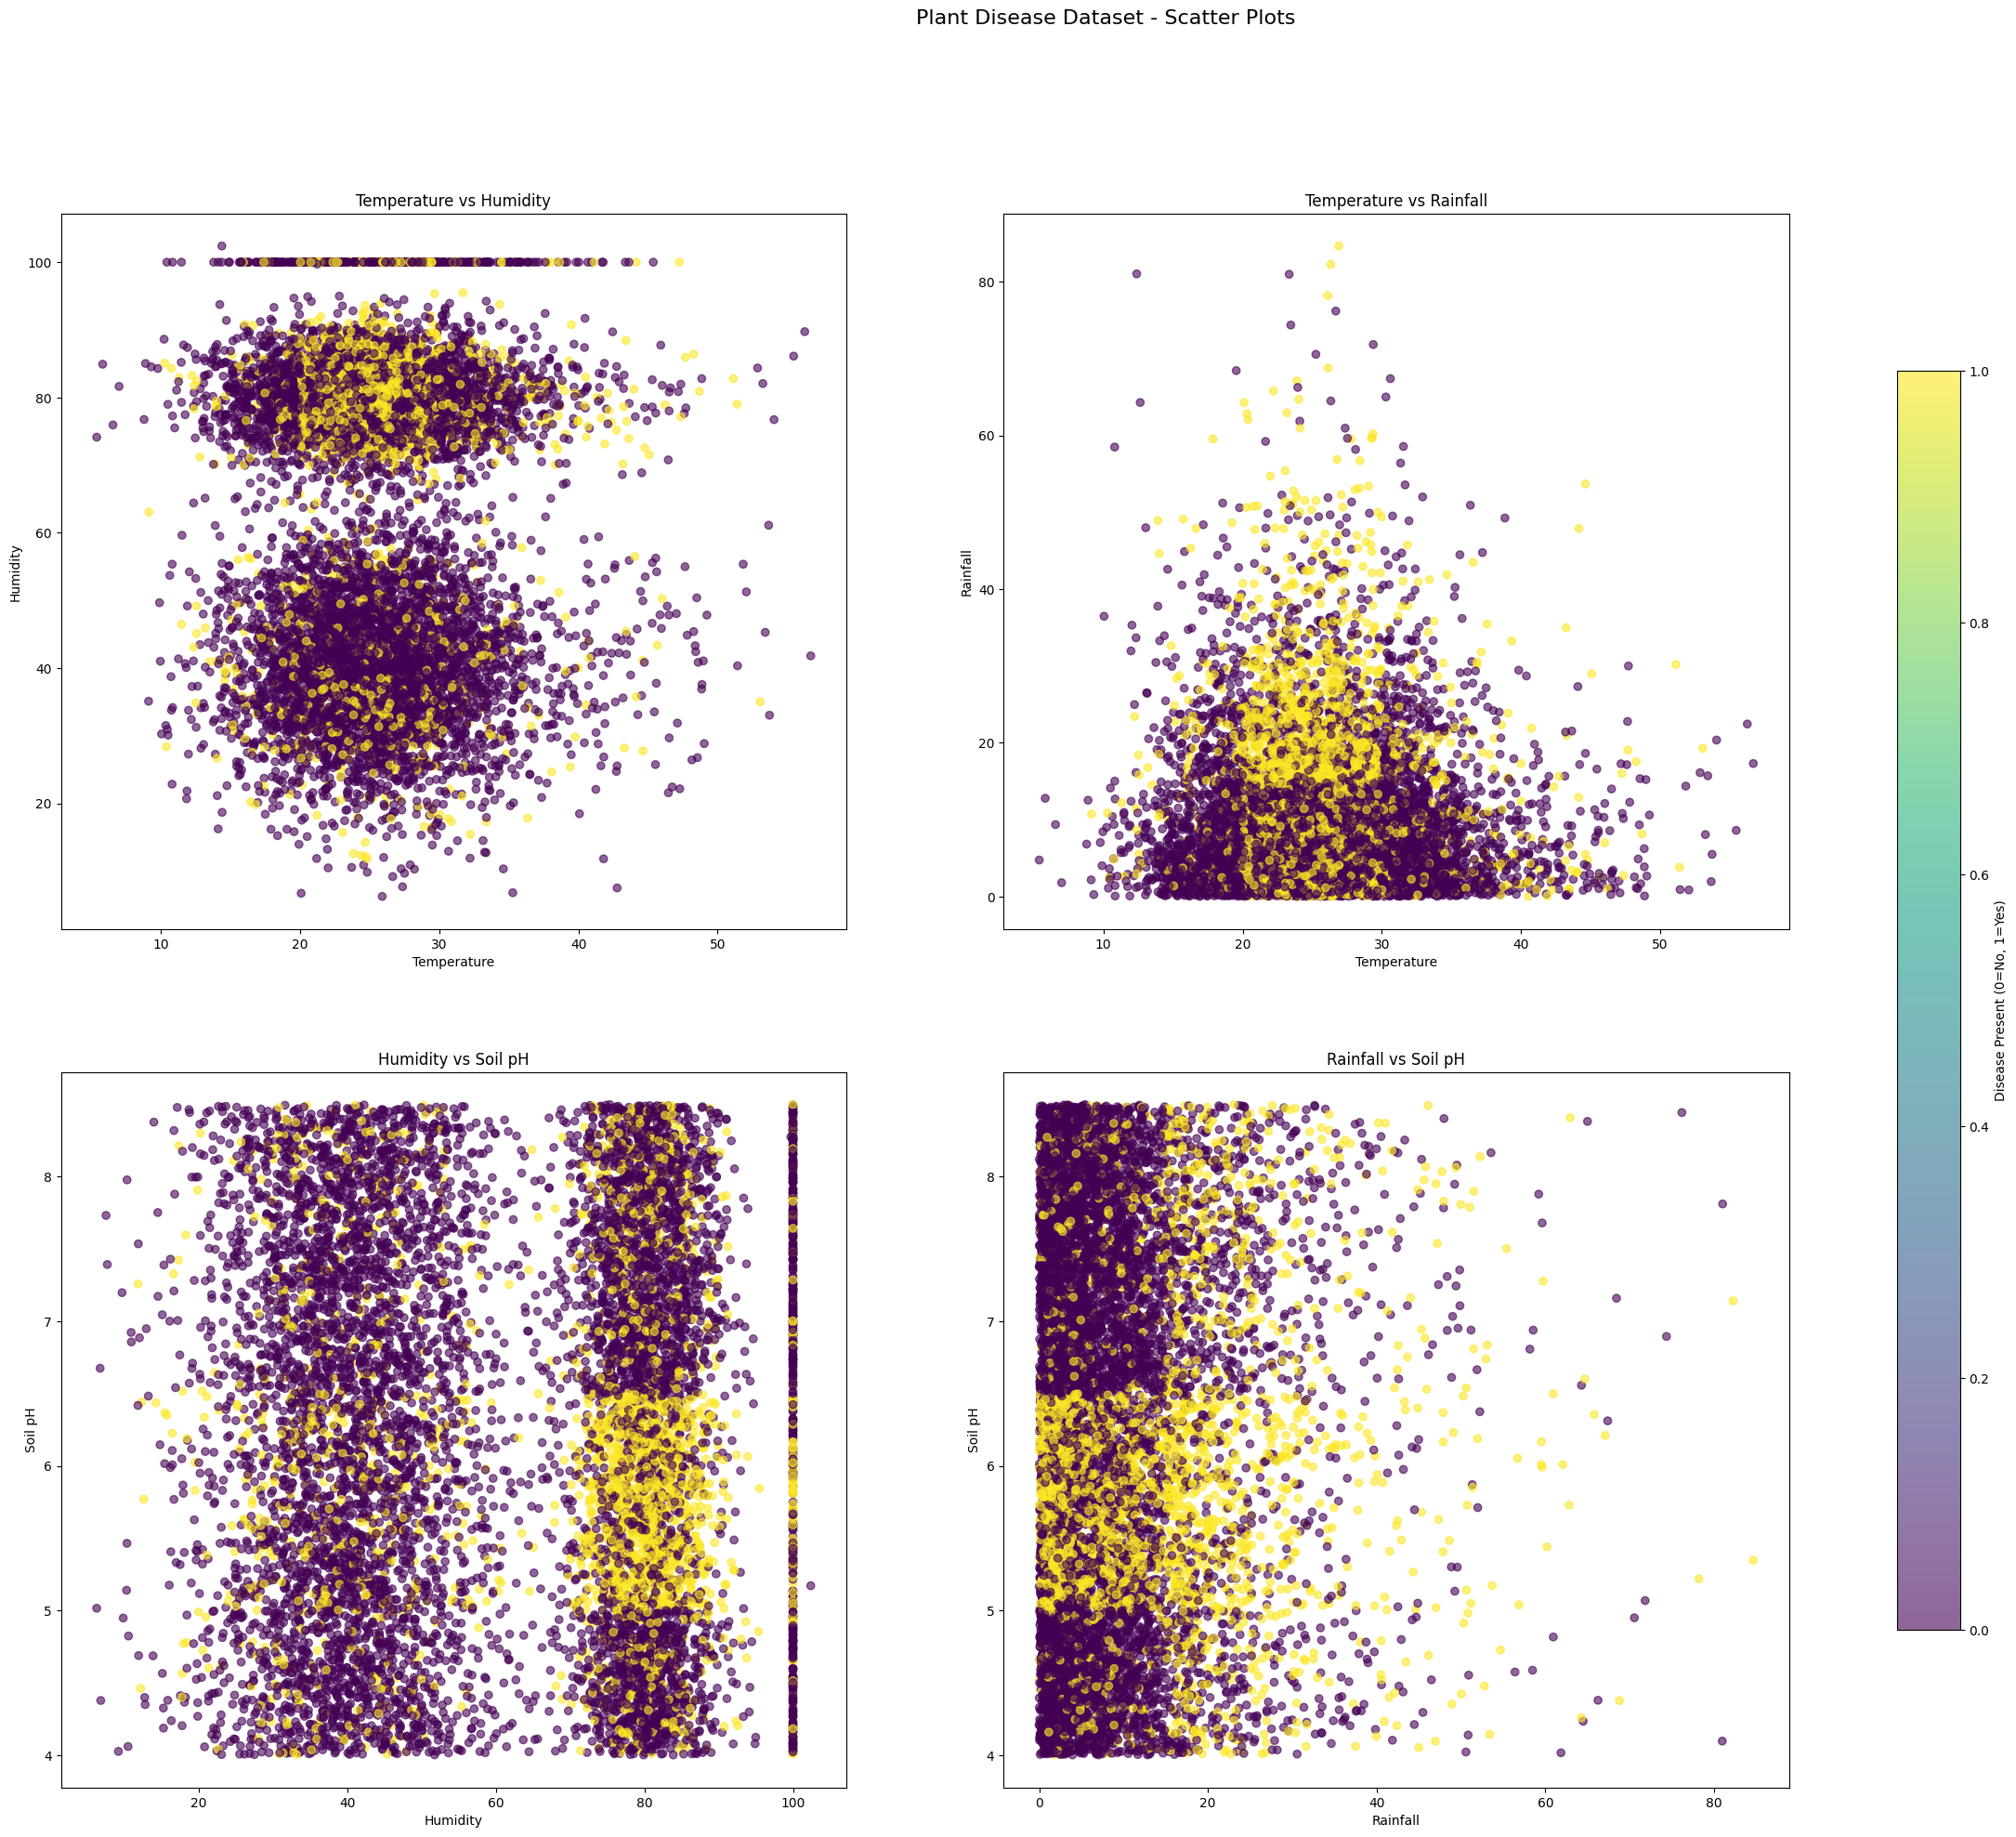

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(30, 22))
fig.suptitle('Plant Disease Dataset - Scatter Plots', fontsize=16)

axes[0, 0].scatter(data['temperature'], data['humidity'], 
                   c=data['disease_present'], cmap='viridis', alpha=0.6)
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Humidity')
axes[0, 0].set_title('Temperature vs Humidity')

axes[0, 1].scatter(data['temperature'], data['rainfall'], 
                   c=data['disease_present'], cmap='viridis', alpha=0.6)
axes[0, 1].set_xlabel('Temperature')
axes[0, 1].set_ylabel('Rainfall')
axes[0, 1].set_title('Temperature vs Rainfall')

axes[1, 0].scatter(data['humidity'], data['soil_pH'], 
                   c=data['disease_present'], cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel('Humidity')
axes[1, 0].set_ylabel('Soil pH')
axes[1, 0].set_title('Humidity vs Soil pH')

scatter = axes[1, 1].scatter(data['rainfall'], data['soil_pH'], 
                            c=data['disease_present'], cmap='viridis', alpha=0.6)
axes[1, 1].set_xlabel('Rainfall')
axes[1, 1].set_ylabel('Soil pH')
axes[1, 1].set_title('Rainfall vs Soil pH')

cbar = plt.colorbar(scatter, ax=axes, shrink=0.8)
cbar.set_label('Disease Present (0=No, 1=Yes)')

plt.show()